In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("coating_sampled.csv")

# Basic preview
df.head()


,date,coil,target,thickness,width,speed,tension,gap_top,gap_bot,pressure_top,pressure_bot,angle_top,angle_bot,weight_top,weight_bot
0,2.016070e+13,CRG2188,62,0.691,1113.0,155,2.503,7.80,7.80,0.314,0.310,-0.2,-0.6,64.866667,65.966667
1,2.016070e+13,CRG2188,62,0.691,1113.0,155,2.493,7.85,7.75,0.298,0.317,-0.2,-0.6,62.300000,62.633333
2,2.016070e+13,CRG2188,62,0.691,1113.0,155,2.508,7.80,7.80,0.305,0.294,-0.2,-0.6,63.200000,62.566667
3,2.016070e+13,CRG2188,62,0.691,1113.0,155,2.507,7.80,7.80,0.304,0.294,-0.2,-0.6,64.700000,61.266667
4,2.016070e+13,CRG2188,62,0.691,1113.0,155,2.504,7.80,7.80,0.305,0.292,-0.2,-0.6,64.566667,63.733333


In [5]:
# Check structure and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          103 non-null    float64
 1   coil          103 non-null    object 
 2   target        103 non-null    int64  
 3   thickness     103 non-null    float64
 4   width         103 non-null    float64
 5   speed         103 non-null    int64  
 6   tension       103 non-null    float64
 7   gap_top       103 non-null    float64
 8   gap_bot       103 non-null    float64
 9   pressure_top  103 non-null    float64
 10  pressure_bot  103 non-null    float64
 11  angle_top     103 non-null    float64
 12  angle_bot     103 non-null    float64
 13  weight_top    103 non-null    float64
 14  weight_bot    103 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 12.2+ KB


date            0
coil            0
target          0
thickness       0
width           0
speed           0
tension         0
gap_top         0
gap_bot         0
pressure_top    0
pressure_bot    0
angle_top       0
angle_bot       0
weight_top      0
weight_bot      0
dtype: int64

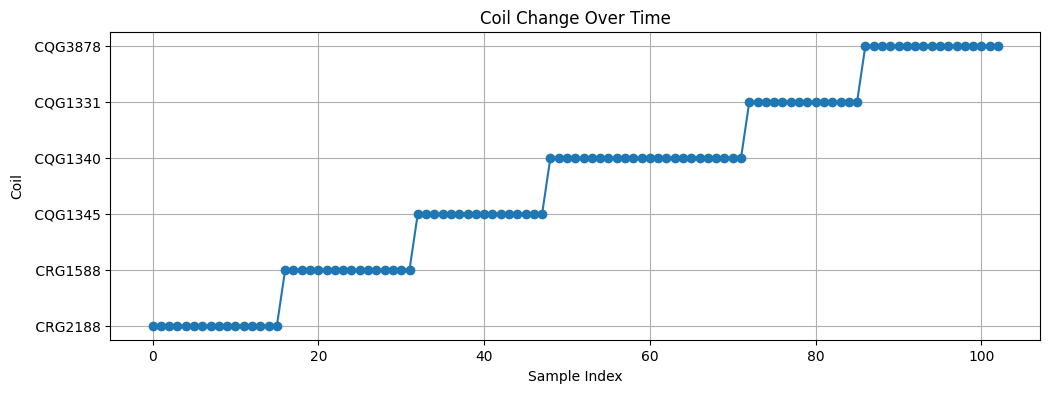

In [6]:
# Coil 전환 시점 시각화
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['coil'], marker='o')
plt.title("Coil Change Over Time")
plt.xlabel("Sample Index")
plt.ylabel("Coil")
plt.grid(True)
plt.show()


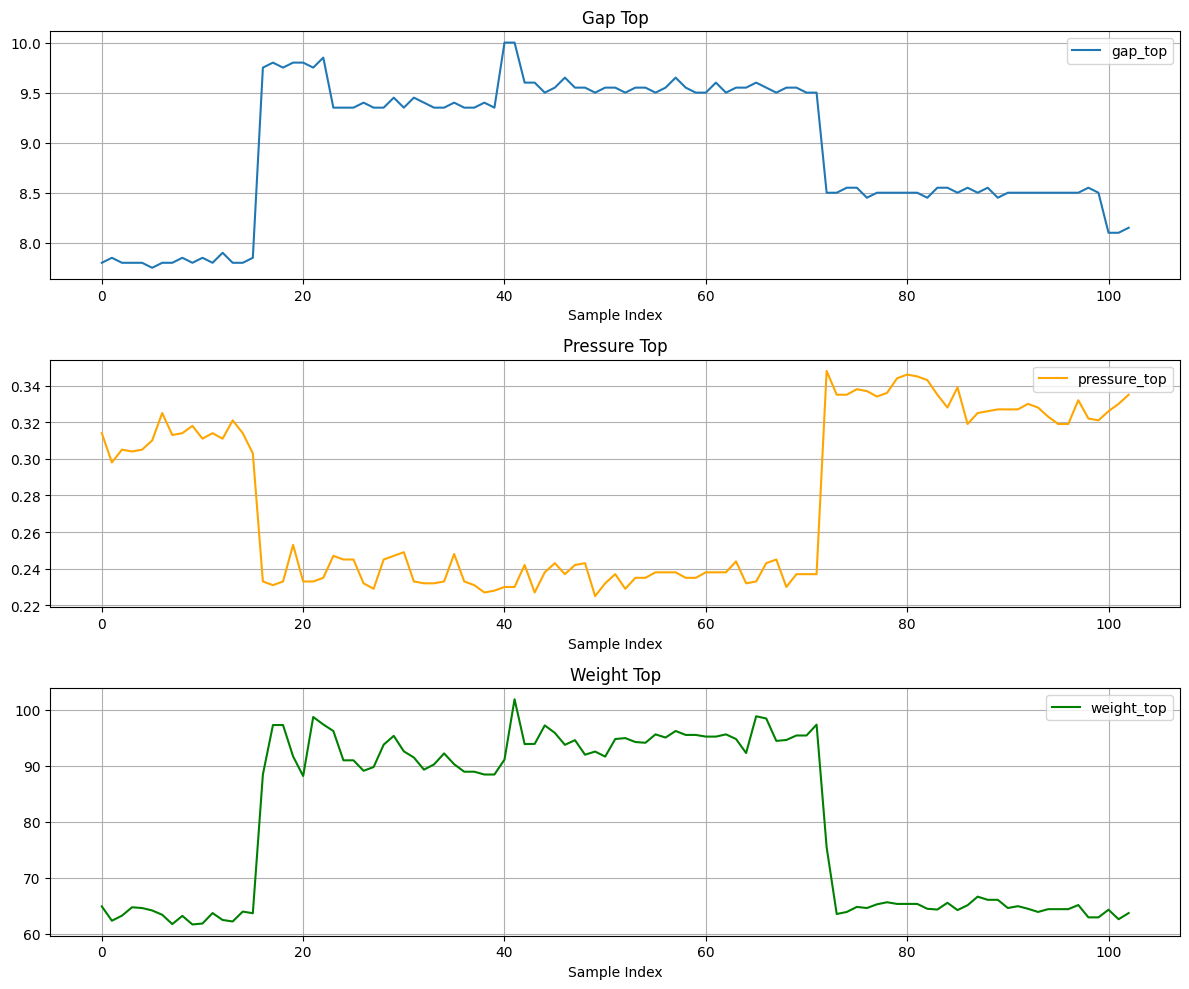

In [7]:
# 제어변수와 결과 시각화 (top-side)
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(df['gap_top'], label='gap_top')
axs[0].set_title("Gap Top")

axs[1].plot(df['pressure_top'], label='pressure_top', color='orange')
axs[1].set_title("Pressure Top")

axs[2].plot(df['weight_top'], label='weight_top', color='green')
axs[2].set_title("Weight Top")

for ax in axs:
    ax.set_xlabel("Sample Index")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


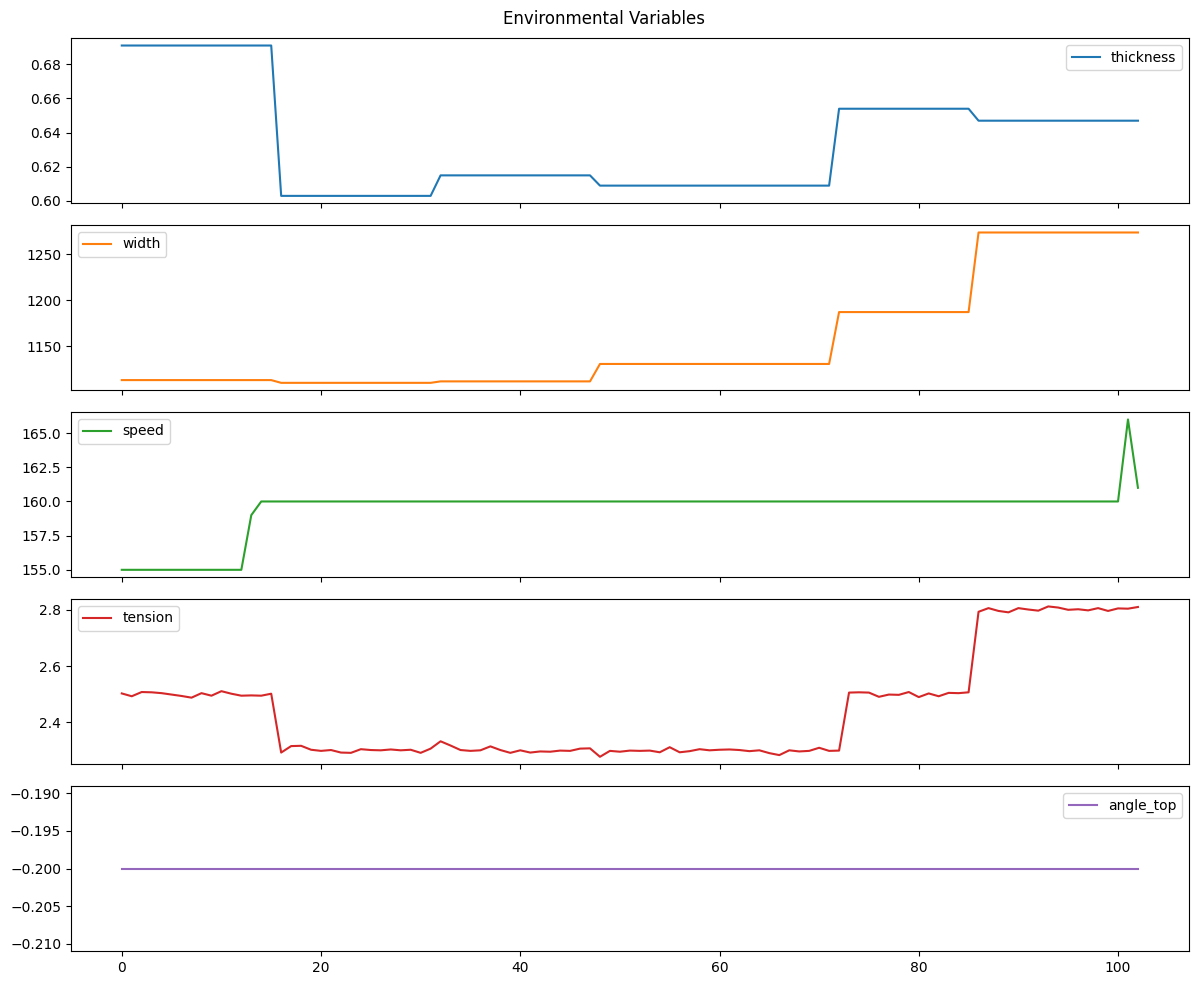

In [8]:
env_vars = ['thickness', 'width', 'speed', 'tension', 'angle_top']
df[env_vars].plot(subplots=True, figsize=(12, 10), title="Environmental Variables")
plt.tight_layout()

angle top은 변수로서 의미가 없음

In [20]:
# 코일이 변경되는 인덱스 찾기
coil_change_idxs = df[df["coil"] != df["coil"].shift(1)].index.to_list()
coil_change_idxs

[0, 16, 32, 48, 72, 86]

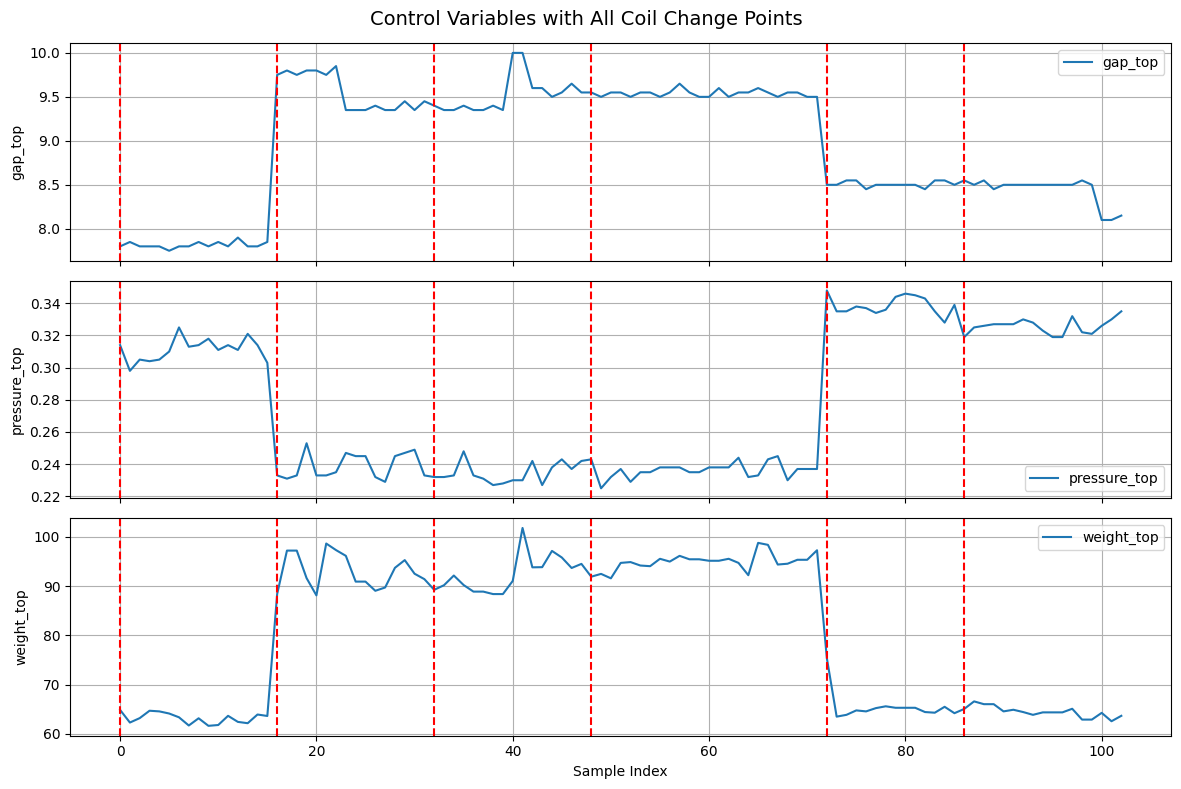

In [21]:
# 시각화: 제어 변수
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
control_vars = ['gap_top', 'pressure_top', 'weight_top']
for i, var in enumerate(control_vars):
    axs[i].plot(df.index, df[var], label=var)
    for idx in coil_change_idxs:
        axs[i].axvline(x=idx, color='red', linestyle='--')
    axs[i].set_ylabel(var)
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel("Sample Index")
fig.suptitle("Control Variables with All Coil Change Points", fontsize=14)
plt.tight_layout()
plt.show()

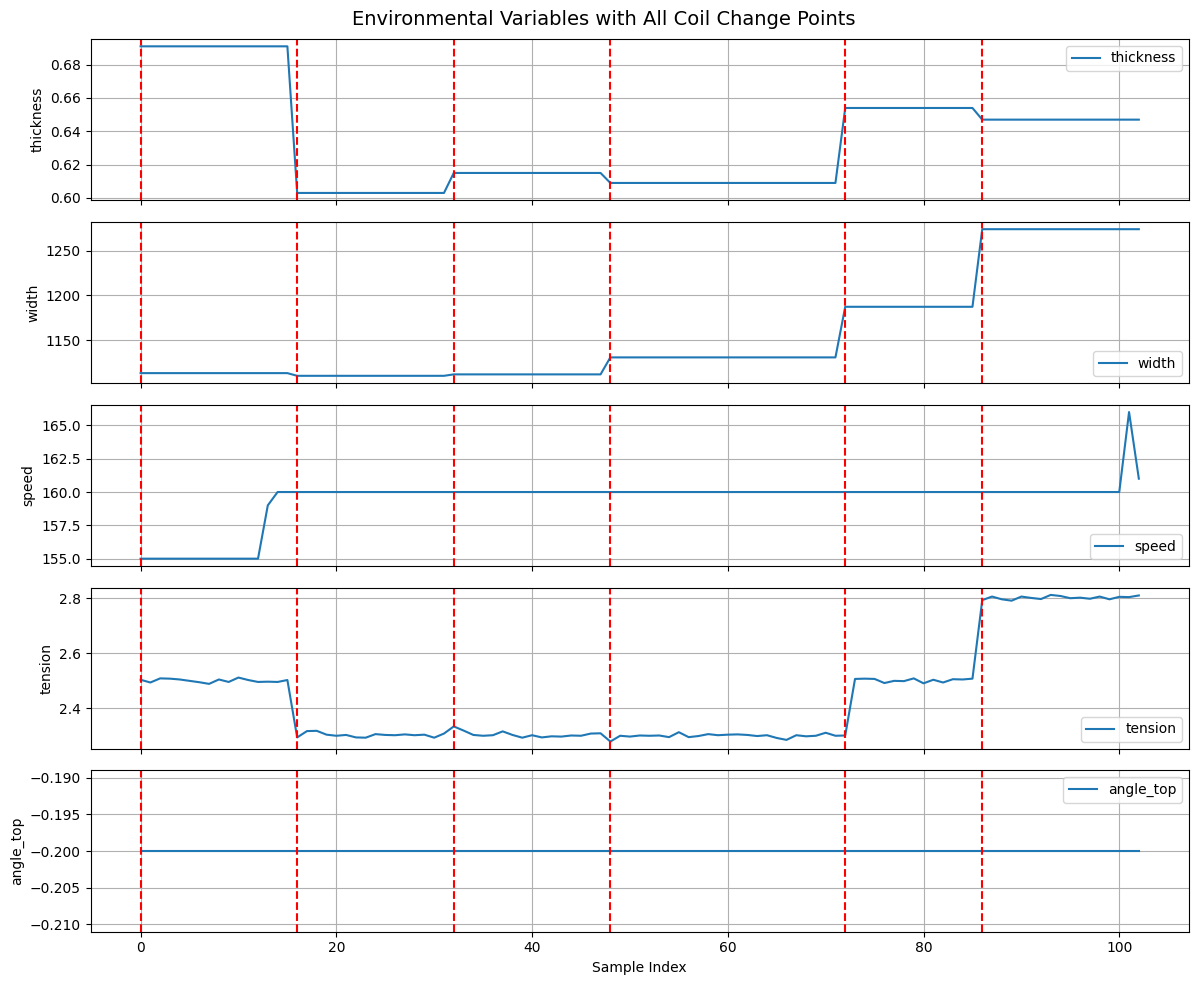

In [22]:
# 시각화: 환경 변수
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
env_vars = ['thickness', 'width', 'speed', 'tension', 'angle_top']
for i, var in enumerate(env_vars):
    axs[i].plot(df.index, df[var], label=var)
    for idx in coil_change_idxs:
        axs[i].axvline(x=idx, color='red', linestyle='--')
    axs[i].set_ylabel(var)
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel("Sample Index")
fig.suptitle("Environmental Variables with All Coil Change Points", fontsize=14)
plt.tight_layout()
plt.show()

env는 coil의 종류가 동일하면 거의 동일하게 유지됨, contral var은 아님

In [31]:
df = pd.read_csv("coating_sampled.csv")
df_filtered = df[df['coil'] == ' CRG2188'][env_vars]

In [32]:
df = pd.read_csv("coating_sampled.csv")
df['coil']

0       CRG2188
1       CRG2188
2       CRG2188
3       CRG2188
4       CRG2188
         ...   
98      CQG3878
99      CQG3878
100     CQG3878
101     CQG3878
102     CQG3878
Name: coil, Length: 103, dtype: object

In [33]:
df_filtered

,thickness,width,speed,tension,angle_top
0,0.691,1113.0,155,2.503,-0.2
1,0.691,1113.0,155,2.493,-0.2
2,0.691,1113.0,155,2.508,-0.2
3,0.691,1113.0,155,2.507,-0.2
4,0.691,1113.0,155,2.504,-0.2
5,0.691,1113.0,155,2.499,-0.2
6,0.691,1113.0,155,2.494,-0.2
7,0.691,1113.0,155,2.488,-0.2
8,0.691,1113.0,155,2.504,-0.2
9,0.691,1113.0,155,2.495,-0.2


In [ ]:
df_filtered = df[df['coil'] == ' CRG1588'][:]

In [35]:
df_filtered

,date,coil,target,thickness,width,speed,tension,gap_top,gap_bot,pressure_top,pressure_bot,angle_top,angle_bot,weight_top,weight_bot
16,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.293,9.75,9.75,0.233,0.227,-0.2,-0.6,88.400000,86.800000
17,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.316,9.80,9.85,0.231,0.231,-0.2,-0.6,97.233333,99.100000
18,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.317,9.75,9.85,0.233,0.234,-0.2,-0.6,97.233333,99.100000
19,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.303,9.80,9.85,0.253,0.243,-0.2,-0.6,91.633333,99.400000
20,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.299,9.80,9.80,0.233,0.233,-0.2,-0.6,88.133333,94.266667
21,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.302,9.75,9.80,0.233,0.227,-0.2,-0.6,98.666667,89.366667
22,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.293,9.85,9.85,0.235,0.232,-0.2,-0.6,97.333333,95.566667
23,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.292,9.35,9.75,0.247,0.241,-0.2,-0.6,96.166667,92.800000
24,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.305,9.35,10.30,0.245,0.247,-0.2,-0.6,90.933333,95.200000
25,2.016070e+13,CRG1588,93,0.603,1110.0,160,2.302,9.35,10.30,0.245,0.246,-0.2,-0.6,90.933333,95.200000
